In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

In [87]:
data = pd.read_parquet("../data/data_parquet/weights.parquet", engine="pyarrow")

In [100]:
data

,flight_id,estimated_zfws,actual_zfws,actual_take_off_fuels,minimum_take_off_fuels,actual_tows,total_pax,economy,business,jump_seats,...,total_bags,total_bag_weights,males,females,j_distributions,y_distributions,j_capacities,y_capacities,airline_code,flight_number
0,MN-1030-2024-1-4-BGI,[],[],[],[],[],"[236, 0]","[212, 0]","[24, 0]",[0],...,[0],[0],[108],[124],"[0, 0, 0]","[0, 0, 0]","[1030, 0, 0]","[0, 160, 127]",MN,1030
1,MN-1030-2024-1-5-BGI,[],[],[],[],[],"[236, 240, 236, 240]","[212, 214, 212, 214]","[24, 26, 24, 26]",[0],...,"[234, 223, 238, 223, 238, 218, 220, 226, 227, ...","[3510, 3345, 3570, 3345, 3570, 3270, 310300, 3...","[108, 123, 108, 123]","[124, 117, 124, 117]","[26, 0, 0]","[0, 124, 90]","[1030, 0, 0]","[0, 160, 127]",MN,1030
2,MN-1030-2024-3-5-BGI,[],[],[],[],[],"[189, 0, 189, 188, 189, 188, 189, 188]","[168, 0, 168, 167, 168, 167, 168, 167]","[21, 0, 21]",[0],...,"[0, 186, 155, 202, 155, 186, 190, 199, 202]","[0, 2790, 2325, 10301030, 2325, 2790, 2850, 29...","[93, 102, 93, 102, 101, 102, 101, 102, 101]","[94, 86, 94, 86]","[21, 0, 0]","[0, 95, 72]","[1030, 0, 0]","[0, 160, 127]",MN,1030
3,MN-1030-2024-5-5-BGI,[],[],[],[],[],"[226, 0, 226]","[202, 0, 202, 201, 202, 201]","[24, 0, 24, 25, 24, 25]",[0],...,"[0, 224, 233, 235, 237, 223, 224]","[0, 3360, 3495, 3525, 3555, 3345, 3360]","[112, 119, 112, 119]","[110, 106, 110, 106]","[25, 0, 0]","[0, 117, 84]","[1030, 0, 0]","[0, 160, 127]",MN,1030
4,MN-1034-2024-2-5-MCO,[],[],[],[],[],"[181, 0, 188, 187, 188, 187]","[163, 0, 170, 169, 170, 169]","[18, 0, 18]",[0],...,"[0, 176, 216, 195, 169, 171, 168]","[0, 2640, 3240, 2925, 2535, 2565, 2520]","[82, 86, 96, 86, 96]","[88, 91, 83, 91, 83]","[18, 0, 0]","[0, 81, 88]","[30, 0, 0]","[0, 160, 127]",MN,1034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,MN-4250-2024-4-5-DUB,[],[],[],[],[],"[160, 164, 151, 164, 151]","[160, 164, 151, 164, 151]",[],[0],...,"[0, 160, 105, 70, 67, 62, 66]","[0, 2080, 1365, 910, 871, 806, 858]","[78, 77, 80, 82, 80, 82]","[81, 82, 83, 68, 83, 68]","[0, 0, 0]","[51, 47, 53]","[0, 0, 0]","[60, 60, 54]",MN,4250
996,MN-4250-2024-5-5-DUB,[],[],[],[],[],"[85, 87, 88, 83, 88, 83, 88, 83, 79, 83, 81, 8...","[85, 87, 88, 83, 88, 83, 88, 83, 79, 83, 81, 8...",[],[0],...,"[0, 85, 70, 54, 70, 61, 70, 54]","[0, 1105, 910, 702, 910, 793, 910, 702]","[47, 46, 48, 49, 45, 49, 45, 49, 45, 42, 45, 4...","[38, 39, 38, 39, 38, 39, 38, 37, 38, 37, 38, 37]","[0, 0, 0]","[14, 39, 26]","[0, 0, 0]","[60, 60, 54]",MN,4250
997,MN-4250-2024-7-5-DUB,[],[],[],[],[],"[78, 77, 76, 74, 76, 74, 70, 74, 70]","[78, 77, 76, 74, 76, 74, 70, 74, 70]",[],[0],...,"[0, 78, 70, 53, 27]","[0, 1014, 910, 689, 351]","[44, 43, 44, 50, 44, 50, 48, 50, 48]","[33, 34, 33, 31, 23, 31, 23, 21, 23, 21]","[0, 0, 0]","[12, 35, 23]","[0, 0, 0]","[60, 60, 54]",MN,4250
998,MN-4250-2024-8-5-DUB,[],[],[],[],[],[84],[84],[],[0],...,"[0, 84, 71]","[0, 1092, 923]",[42],[42],"[0, 0, 0]","[7, 18, 18]","[0, 0, 0]","[60, 60, 54]",MN,4250


In [93]:
data_modified= data.map(lambda x: None if isinstance(x, np.ndarray) and x.size == 0 else x)
data_modified["females"] = data_modified["females"].apply(lambda x: x[-1] if x is not None else 0)
data_modified["males"] = data_modified["males"].apply(lambda x: x[-1] if x is not None else 0)
data_modified["infants"] = data_modified["infants"].apply(lambda x: x[-1] if x is not None else 0)
data_modified["children"] = data_modified["children"].apply(lambda x: x[-1] if x is not None else 0)
data_modified["total_pax"] = data_modified["total_pax"].apply(lambda x: x[-1] if x is not None else 0)
data_modified["economy"] = data_modified["economy"].apply(lambda x: x[-1] if x is not None else 0)
data_modified["business"] = data_modified["business"].apply(lambda x: x[-1] if x is not None else 0)
data_modified["total_bags"] = data_modified["total_bags"].apply(lambda x: x[-1] if x is not None else 0)
data_modified["total_bag_weights"] = data_modified["total_bag_weights"].apply(lambda x: x[-1] if x is not None else 0)

data_modified["j_distributions"] = data_modified["j_distributions"].apply(lambda x: np.sum([int(i) for i in x]) if x is not None else 0)
data_modified["y_distributions"] = data_modified["y_distributions"].apply(lambda x: np.sum([int(i) for i in x]) if x is not None else 0)
data_modified["j_capacities"] = data_modified["j_capacities"].apply(lambda x: np.sum([int(i) for i in x]) if x is not None else 0)
data_modified["y_capacities"] = data_modified["y_capacities"].apply(lambda x: np.sum([int(i) for i in x]) if x is not None else 0)

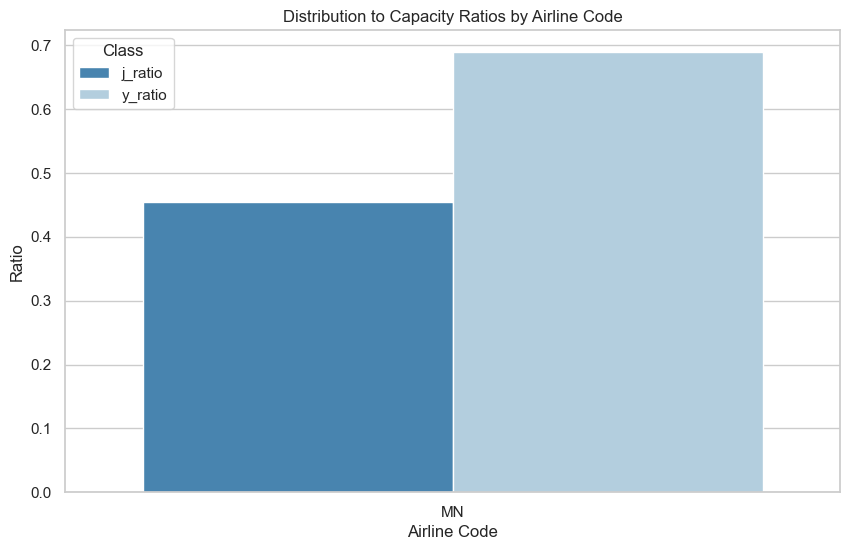

In [97]:
capacities_distribution_ratio = data_modified[['j_distributions', 'y_distributions', 'j_capacities', 'y_capacities', 'airline_code']]
capacities_distribution_ratio = capacities_distribution_ratio.groupby("airline_code").sum() 

capacities_distribution_ratio['j_ratio'] = capacities_distribution_ratio['j_distributions'] / capacities_distribution_ratio['j_capacities']
capacities_distribution_ratio['y_ratio'] = capacities_distribution_ratio['y_distributions'] / capacities_distribution_ratio['y_capacities']
capacities_distribution_ratio = capacities_distribution_ratio.reset_index()

# Melt the DataFrame to long format for Seaborn plotting
data_melted = pd.melt(capacities_distribution_ratio, id_vars='airline_code', value_vars=['j_ratio', 'y_ratio'],
                      var_name='Class', value_name='Ratio')


# Plot the ratios using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='airline_code', y='Ratio', hue='Class', data=data_melted, palette='Blues_r')
plt.title('Distribution to Capacity Ratios by Airline Code')
plt.xlabel('Airline Code')
plt.ylabel('Ratio')
plt.legend(title='Class')
plt.xticks(rotation=0)
plt.show()
# title bold, x achsen beschriften

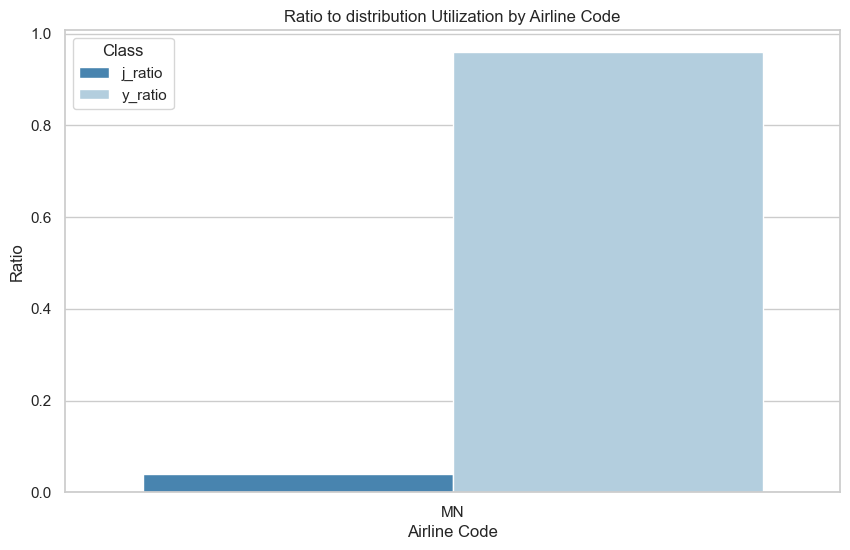

In [98]:
capacities_distribution_ratio = data_modified[['j_distributions', 'y_distributions', 'j_capacities', 'y_capacities', 'airline_code']]
capacities_distribution_ratio = capacities_distribution_ratio.groupby("airline_code").sum() 

capacities_distribution_ratio['j_ratio'] = capacities_distribution_ratio['j_distributions'] / (capacities_distribution_ratio['j_distributions'] + capacities_distribution_ratio['y_distributions'])
capacities_distribution_ratio['y_ratio'] = capacities_distribution_ratio['y_distributions'] / (capacities_distribution_ratio['y_distributions'] + capacities_distribution_ratio['j_distributions'])
capacities_distribution_ratio = capacities_distribution_ratio.reset_index()

# Melt the DataFrame to long format for Seaborn plotting
data_melted = pd.melt(capacities_distribution_ratio, id_vars='airline_code', value_vars=['j_ratio', 'y_ratio'],
                      var_name='Class', value_name='Ratio')


# Plot the ratios using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='airline_code', y='Ratio', hue='Class', data=data_melted, palette='Blues_r')
plt.title('Ratio to distribution Utilization by Airline Code')
plt.xlabel('Airline Code')
plt.ylabel('Ratio')
plt.legend(title='Class')
plt.xticks(rotation=0)
plt.show()

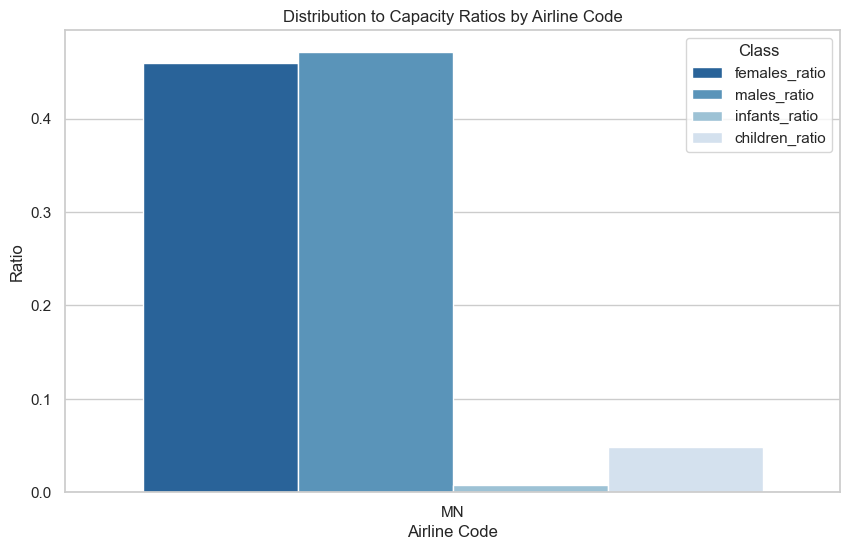

In [92]:
persons_ratio = data_modified[["females", "males", "infants", "children", "total_pax", "airline_code"]].copy()
persons_ratio = persons_ratio.groupby("airline_code").sum() 
persons_ratio["females_ratio"] = persons_ratio["females"] / persons_ratio["total_pax"]
persons_ratio["males_ratio"] = persons_ratio["males"] / persons_ratio["total_pax"]
persons_ratio["children_ratio"] = persons_ratio["children"] / persons_ratio["total_pax"]
persons_ratio["infants_ratio"] = persons_ratio["infants"] / persons_ratio["total_pax"]
persons_ratio = persons_ratio.reset_index()

# Melt the DataFrame to long format for Seaborn plotting
data_melted = pd.melt(persons_ratio, id_vars='airline_code', value_vars=['females_ratio', 'males_ratio', 'infants_ratio', 'children_ratio'],
                      var_name='Class', value_name='Ratio')


# Plot the ratios using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='airline_code', y='Ratio', hue='Class', data=data_melted, palette='Blues_r')
plt.title('Distribution to Capacity Ratios by Airline Code')
plt.xlabel('Airline Code')
plt.ylabel('Ratio')
plt.legend(title='Class')
plt.xticks(rotation=0)
plt.show()